# Self-Driving Car Engineer Nanodegree

## Project3: Traffic Sign Classification

The goals / steps of this project are the following:
* Load the data set
* Explore, summarize and visualize the data set
* Data preprocessing
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report

---
## Step 0: Load The Data

In [27]:
# Load pickled data
import pickle

# File paths to training, validation and testing data

training_file = './traffic_signs_data/train.p'
validation_file= './traffic_signs_data/valid.p'
testing_file = './traffic_signs_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [28]:
# Number of training examples
n_train = x_train.shape[0]

# Number of validation examples
n_validation = x_valid.shape[0]

# Number of testing examples.
n_test = x_test.shape[0]

# Shape of a traffic sign image?
image_shape = x_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

a) Traffic sign data csv: classId and signal name

b) Training data histogram

c) Testing data histogram

d) Validation data histogram

e) 6 random images visulization with class identification: 2 training, 2 test and 2 validation data

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
%matplotlib inline

#Source https://plot.ly/python/plot-data-from-csv/

traffic_sign_data = pd.read_csv('./signnames.csv')
traffic_sign_data


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


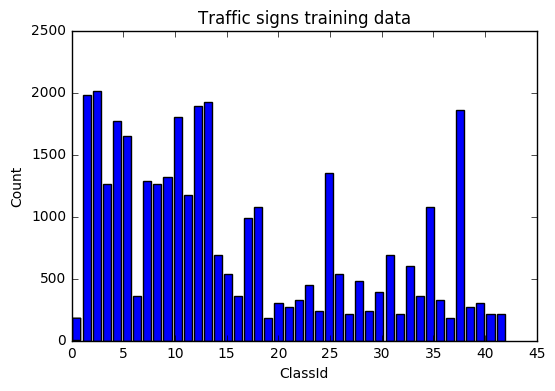

In [30]:
plt.hist(y_train, n_classes, rwidth=0.8)
plt.ylabel('Count')
plt.xlabel('ClassId')
plt.title('Traffic signs training data')
plt.show()

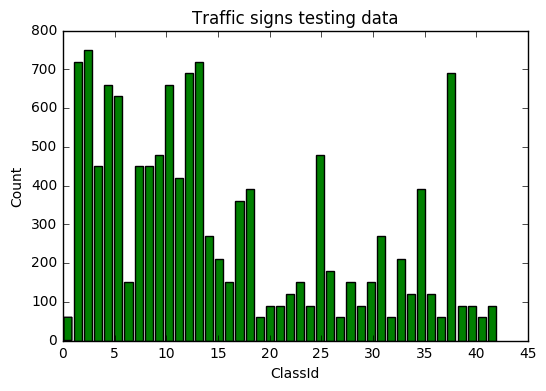

In [31]:
plt.hist(y_test, n_classes, rwidth=0.8, color = "green")
plt.ylabel('Count')
plt.xlabel('ClassId')
plt.title('Traffic signs testing data')
plt.show()

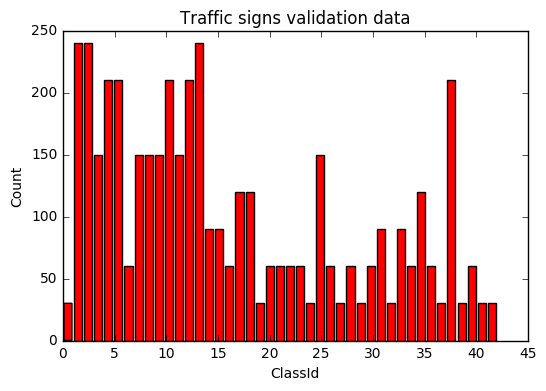

In [32]:
plt.hist(y_valid, n_classes, rwidth=0.8, color = "red")
plt.ylabel('Count')
plt.xlabel('ClassId')
plt.title('Traffic signs validation data')
plt.show()

,ClassId,SignName
13,13,Yield


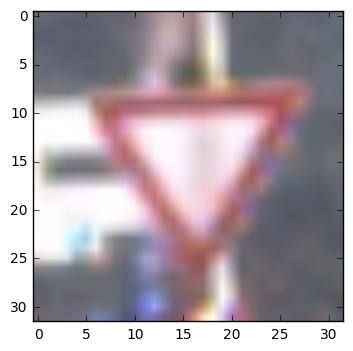

In [33]:
index1 = np.random.randint(len(x_train))
traffic_sign_image1 = x_train[index1]
plt.figure();
plt.imshow(traffic_sign_image1);
traffic_sign_data[traffic_sign_data['ClassId'] == y_train[index1]]

,ClassId,SignName
13,13,Yield


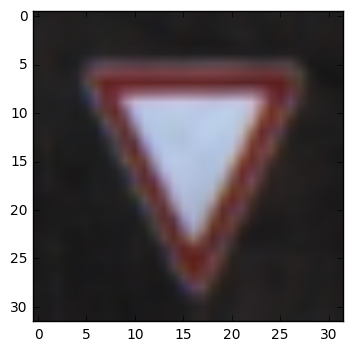

In [34]:
index2 = np.random.randint(len(x_train))
traffic_sign_image2 = x_train[index2]
plt.figure();
plt.imshow(traffic_sign_image2);
traffic_sign_data[traffic_sign_data['ClassId'] == y_train[index2]]

,ClassId,SignName
34,34,Turn left ahead


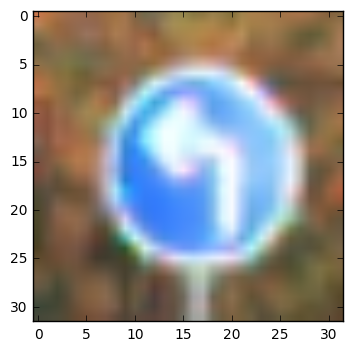

In [35]:
index3 = np.random.randint(len(x_valid))
traffic_sign_image3 = x_valid[index3]
plt.figure();
plt.imshow(traffic_sign_image3);
traffic_sign_data[traffic_sign_data['ClassId'] == y_valid[index3]]

,ClassId,SignName
2,2,Speed limit (50km/h)


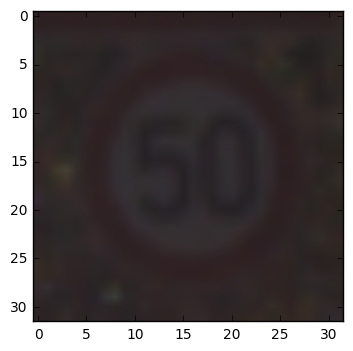

In [36]:
index4 = np.random.randint(len(x_valid))
traffic_sign_image4 = x_valid[index4]
plt.figure();
plt.imshow(traffic_sign_image4);
traffic_sign_data[traffic_sign_data['ClassId'] == y_valid[index4]]

,ClassId,SignName
36,36,Go straight or right


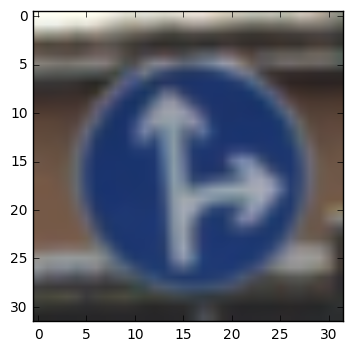

In [37]:
index5 = np.random.randint(len(x_test))
traffic_sign_image5 = x_train[index5]
plt.figure();
plt.imshow(traffic_sign_image5);
traffic_sign_data[traffic_sign_data['ClassId'] == y_train[index5]]

,ClassId,SignName
29,29,Bicycles crossing


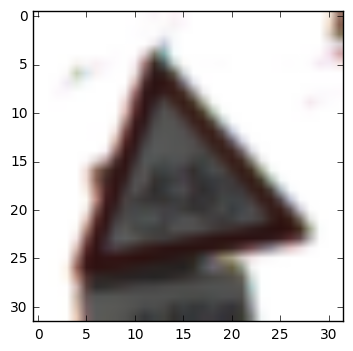

In [38]:
index6 = np.random.randint(len(x_test))
traffic_sign_image6 = x_train[index6]
plt.figure();
plt.imshow(traffic_sign_image6);
traffic_sign_data[traffic_sign_data['ClassId'] == y_train[index6]]

From the images visuazlization, it is possible to notice that there are some very bright ones (8418) and some dark ones (9911). Background presents the same problem, passing from a one with sky (16852) to a one with a dark  backgraound (9911). Also zoom is different from image to image. All the images are quite blurry.

## Step 2: Data Preprocessing

### a) Augment the dataset. This is done in 3 sdifferent ways:

a) Image filtering
b) Image rotation 
c) Combination of filtering and rotation

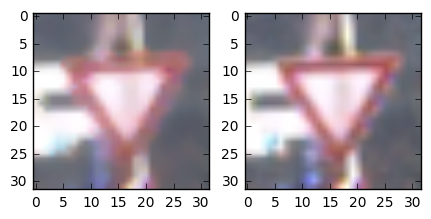

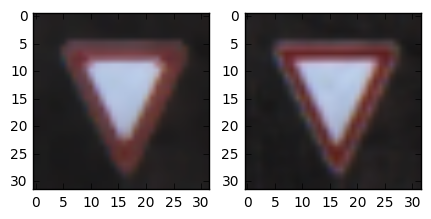

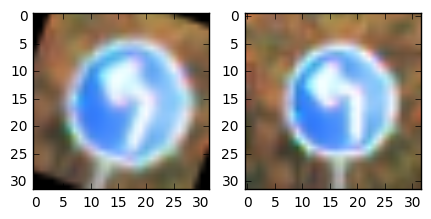

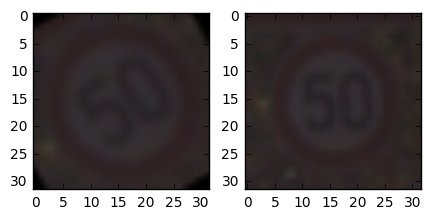

In [39]:
### Preprocess the data here. Augment data set

import cv2
import random

def blur_img(img, kernel=3):
    return cv2.medianBlur(img, kernel)

def rotate_img(img):
    # source https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html
    rot_degree = np.random.choice(np.array([10,15,20,25,30]))
    rot_size = np.random.choice(np.array([0.8,0.9,1,1.1,1.2]))
    rot_dir = np.random.choice(np.array([1, -1]))
    rot = cv2.getRotationMatrix2D((16,16),rot_degree * rot_dir, rot_size)
    return cv2.warpAffine(img, rot, (32,32))

fig, ax = plt.subplots(1,2, dpi=160, figsize=(5,5))
ax = ax.ravel()
ax[0].imshow(blur_img(x_train[index1]), cmap='gray') 
ax[1].imshow((x_train[index1]), cmap='gray') 
plt.show()

fig, ax = plt.subplots(1,2, dpi=160, figsize=(5,5))
ax = ax.ravel()
ax[0].imshow(blur_img(x_train[index2]), cmap='gray') 
ax[1].imshow((x_train[index2]), cmap='gray') 
plt.show()

fig, ax = plt.subplots(1,2, dpi=160, figsize=(5,5))
ax = ax.ravel()
ax[0].imshow(rotate_img(x_valid[index3]), cmap='gray') 
ax[1].imshow((x_valid[index3]), cmap='gray') 
plt.show()

fig, ax = plt.subplots(1,2, dpi=160, figsize=(5,5))
ax = ax.ravel()
ax[0].imshow(rotate_img(x_valid[index4]), cmap='gray') 
ax[1].imshow((x_valid[index4]), cmap='gray') 
plt.show()

The traning set is composed of 34799 images, a ~10% more is created (3400).

In [40]:
new_samples = []

# Generate new samples: blur
for i in range(0, 2999):
    img = x_train[np.random.choice(x_train.shape[0])]
    new_sample = blur_img(img)
    new_samples.append([
        new_sample, i])
    
# Generate new samples: rotate
for i in range(3000, 5999):
    img = x_train[np.random.choice(x_train.shape[0])]
    new_sample = rotate_img(img)
    new_samples.append([
        new_sample, i])

# merge with existing 
for i in range(0,len(x_train)):
    new_samples.append([
        x_train[i], y_train[i]
    ])
    
random.shuffle(new_samples)
len(new_samples)

40797

### b) Data processing: all 3 data set should be normalized  and randomized. 

In addition here, since brightness plays an important role, a contrast equalization is performed.

a) Normalization
b) Contrast equalization
c) Randomization

In [41]:
# source https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/histogram_equalization/histogram_equalization.html
# https://github.com/glaumarkus/AD_TrafficSignClassifier/blob/master/Traffic%20Sign%20Classifier.ipynb

def contrast_equalization(img):
    img[:,:,0] = cv2.equalizeHist(img[:,:,0])
    img[:,:,1] = cv2.equalizeHist(img[:,:,1])
    img[:,:,2] = cv2.equalizeHist(img[:,:,2])
    return img


for i in range(0,len(new_samples)):
    new_samples[i][0] = contrast_equalization(new_samples[i][0])
    new_samples[i][0] = new_samples[i][0][:,:,0]

In [42]:
x_train = [x[0].reshape(32,32,1) for x in new_samples] 
y_train = [y[1] for y in new_samples]

# same has to be done with the validation / test data
x_valid = [contrast_equalization(i)[:,:,0].reshape(32,32,1) for i in x_valid]
x_test = [contrast_equalization(i)[:,:,0].reshape(32,32,1) for i in x_test]

In [43]:
print(np.mean(x_train), np.std(x_train))
print(np.mean(x_test), np.std(x_test))

130.12675789388618 74.92087753203549
131.8855960510689 74.51731152266724


In [44]:
x_test -= np.mean(x_test)
x_test /= np.std(x_test)
x_train -= np.mean(x_train)
x_train /= np.std(x_train)
x_valid -= np.mean(x_valid)
x_valid /= np.std(x_valid)

In [45]:
print(np.mean(x_train), np.std(x_train))
print(np.mean(x_test), np.std(x_test))
print(np.mean(x_valid), np.std(x_valid))

1.7669151677480775e-16 1.0000000000000033
-5.2503747808455916e-17 0.9999999999999998
-7.513516138307891e-17 1.0000000000000002


In [46]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)

----

## Step 2: Design and Test a Model Architecture


### Architecture

It is a LeNet architecture modified with dropout for convolutional and fully connected layers.

**Layer 1: Convolutional.** The output shape should be 32x32x8.

**Activation.** ReLu.

**Dropout.**

**Layer 2: Convolutional.** The output shape should be 30x30x16.

**Activation.** ReLu.

**Pooling.** The output shape should be 14x14x16.

**Dropout.**

**Layer 3: Convolutional.** The output shape should be 12x12x32.

**Activation.** ReLu.

**Pooling.** The output shape should be 6x6x32.

**Dropout.**

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 6x6x32 = 1152

**Layer 4: Fully Connected.** This should have 512 outputs.

**Activation.** ReLu

**Dropout.**

**Layer 5: Fully Connected.** This should have 256 outputs.

**Activation.** ReLu

**Dropout.**

**Layer 6: Fully Connected.** This should have 128 outputs.

**Activation.** ReLu

**Dropout.**

**Layer 7: Fully Connected (Logits).** This should have 43 outputs.


### Model Architecture

In [47]:
import tensorflow as tf

EPOCHS = 32
BATCH_SIZE = 128

In [48]:
# source LeNet lab 
from tensorflow.contrib.layers import flatten

def traffic_sign_conv_net(x, one_hot_y, mu = 0, sigma = 0.1, beta = 0.01):  
    
    # Layer 1: 
    # Convolutional. Input = 32x32x1. Output = 28x28x8.
    # in_height = 32
    # in_width  = 32
    # filter_height = 5
    # filter_width  = 5
    # filter_depth  = 8
    # out_height = 32 
    # out_width  = 32 
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 8), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(8))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    
    # Activation
    conv1 = tf.nn.relu(conv1)
    
    # Dropout convolutional
    conv1 = tf.nn.dropout(conv1, keep_p_convolutional)
    
    # Layer 2: 
    # Convolutional. Input = 28x28x8. Output = 26x26x16.
    # in_height = 32
    # in_width  = 32
    # filter_height = 3
    # filter_width  = 3
    # filter_depth  = 16
    # out_height = 30
    # out_width  = 30 
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 8, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Max pooling. Input = 30x30x16.
    # ((30-3+2*0)/2) + 1 = 14
    # Output = 14x14x16.
    
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout convolutional
    conv2 = tf.nn.dropout(conv2, keep_p_convolutional) 
    
    # Layer 3: 
    # Convolutional. Input = 12x12x16. Output = 10x10x32.
    # in_height = 14
    # in_width  = 14
    # filter_height = 3
    # filter_width  = 3
    # filter_depth  = 32
    # out_height = 12
    # out_width  = 12 
    
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3)
    
    # Max pooling. Input = 12x12x32. 
    # ((12-2+2*0)/2) + 1 = 6
    # Output = 6x6x32.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout convolutional
    conv3 = tf.nn.dropout(conv3, keep_p_convolutional) 
    
    # Flatten: 6x6x32 = 1152. 
    # Output = 512.    
    flat  = flatten(conv3)
    
    # Layer 4: 
    # Fully connected
    # Input  = 1152. 
    # Output = 512.
    fc1_W  = tf.Variable(tf.truncated_normal(shape=(1152, 512), mean = mu, stddev = sigma))
    fc1_b  = tf.Variable(tf.zeros(512))
    fc1    = tf.matmul(flat, fc1_W) + fc1_b
    
    # Activation 
    fc1    = tf.nn.relu(fc1)
    
    # Dropout fully connected
    fc1    = tf.nn.dropout(fc1, keep_p_fully_connected)
    
    # Layer 5: 
    # Fully Connected
    # Input  = 512. 
    # Output = 256.
    
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(256))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation 
    fc2    = tf.nn.relu(fc2)
    
    # Dropout fully connected
    fc2    = tf.nn.dropout(fc2, keep_p_fully_connected)
    
    # Layer 6: 
    # Fully Connected
    # Input  = 256. 
    # Output = 128.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(128))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Activation 
    fc3    = tf.nn.relu(fc3)
    
    # Dropout fully connected
    fc3    = tf.nn.dropout(fc3, keep_p_fully_connected)
    
    # Layer 6: 
    # Fully Connected
    # Input  = 128. 
    # Output = 42.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    
    #Activation
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(conv3_W) + tf.nn.l2_loss(fc1_W) \
    + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W) + tf.nn.l2_loss(fc4_W)
    loss_operation = tf.reduce_mean(loss_operation + beta * regularizers)
    
    return logits, loss_operation

## Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [49]:
# Conv preparation
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Dropout probability
keep_p_convolutional = tf.placeholder(tf.float32)
keep_p_fully_connected = tf.placeholder(tf.float32)


## Training Pipeline
Create a training pipeline that uses the model to classify traffic sign data.

In [50]:
# Learning rate
rate = 1e-3
decay = 1e-5*2

logits, loss_operation = traffic_sign_conv_net(x, one_hot_y)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [51]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_p_convolutional:1.00, keep_p_fully_connected:1.00})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [52]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_p_convolutional:0.90, keep_p_fully_connected:0.60})
            
        validation_accuracy = evaluate(x_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        #reduce rate
        rate -= decay
        optimizer = tf.train.AdamOptimizer(learning_rate = rate)

        
    saver.save(sess, './traffic_sign_conv_net')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.048



KeyboardInterrupt: 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [29]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")